In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

# First install CIFAR10 from Keras
from keras.datasets import cifar10

(x_training, y_training), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
# Then split 'training' into two subsets: train and validation.
# After that, we have 3 subsets: train, validation and test.
from sklearn.model_selection import train_test_split

# 80% train, 20% validation, and by stratefied sampling.  
x_train, x_valid, y_train, y_valid = train_test_split(x_training, y_training,
                                                      stratify=y_training, 
                                                      test_size=0.2)

In [3]:
# Obtain the one-hot-vector representation of target (y).
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = 10

y_train_bin = keras.utils.to_categorical(y_train, num_classes)
y_valid_bin = keras.utils.to_categorical(y_valid, num_classes)
y_test_bin = keras.utils.to_categorical(y_test, num_classes)

In [4]:
# Rescale values to a range of 0 to 1 in all three sets
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_valid /= 255.0
x_test /= 255.0

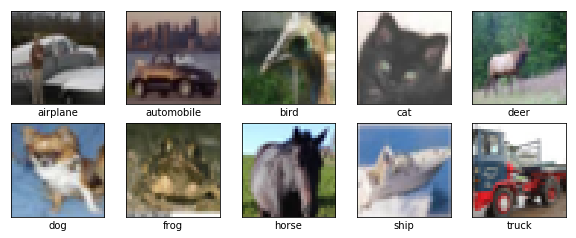

In [5]:
# Show one image from each class from training set
plt.figure(figsize=(10,10))
idx = 0
for i in range(500):
    if(y_train[i]==idx):
        plt.subplot(5,5,idx+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[y_train[i][0]])
        idx+=1

In [59]:
# Build the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), strides=(1,1), input_shape=x_train.shape[1:], activation='relu'),
    keras.layers.Conv2D(32, (3,3), strides=(1,1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), strides=(1,1), activation='relu'),
    keras.layers.Conv2D(64, (3,3), strides=(1,1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# Display the network
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 5, 5, 64)          0         
__________

In [60]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
metrics=['accuracy'])

In [61]:
# Train the model
train_hist = model.fit(x_train, y_train_bin, validation_data=(x_valid, y_valid_bin), batch_size=100, epochs=15)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 86s 2ms/step - loss: 1.6481 - acc: 0.3966 - val_loss: 1.3562 - val_acc: 0.5052
Epoch 2/15
40000/40000 [==============================] - 85s 2ms/step - loss: 1.2306 - acc: 0.5623 - val_loss: 1.0866 - val_acc: 0.6200
Epoch 3/15
40000/40000 [==============================] - 87s 2ms/step - loss: 1.0557 - acc: 0.6261 - val_loss: 0.9946 - val_acc: 0.6506
Epoch 4/15
40000/40000 [==============================] - 86s 2ms/step - loss: 0.9328 - acc: 0.6720 - val_loss: 0.8867 - val_acc: 0.6933
Epoch 5/15
40000/40000 [==============================] - 84s 2ms/step - loss: 0.8389 - acc: 0.7048 - val_loss: 0.8555 - val_acc: 0.7047
Epoch 6/15
40000/40000 [==============================] - 84s 2ms/step - loss: 0.7503 - acc: 0.7372 - val_loss: 0.8015 - val_acc: 0.7215
Epoch 7/15
40000/40000 [==============================] - 85s 2ms/step - loss: 0.6836 - acc: 0.7608 - val_loss: 0.7571 - val_acc

In [62]:
test_loss, test_acc = model.evaluate(x_test, y_test_bin)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 9s 906us/step
Test accuracy: 0.7585


In [63]:
pred = model.predict(x_test, verbose=1)
predDF = pd.DataFrame(pred)
predDF = predDF.reset_index()
predDF.columns = ('id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9')
predDF['id'] = predDF['id']+1
predDF.to_csv('kaggle.csv', index=False)

10000/10000 [==============================] - 10s 1ms/step
